# PROBLEM STATEMENT

You have been hired as a consultant to a start-up that is running a targetting marketting ads on facebook.
The company wants to analyze the customer behavior by predicting which customer clicks on the advertisement.
Customer data is as follows:

# STEP#0: IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# STEP #1: IMPORT DATASET

In [3]:
?pd.read_csv

Signature:
pd.read_csv(
    filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]',
    *,
    sep: 'str | None | lib.NoDefault' = <no_default>,
    delimiter: 'str | None | lib.NoDefault' = None,
    header: "int | Sequence[int] | None | Literal['infer']" = 'infer',
    names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>,
    index_col: 'IndexLabel | Literal[False] | None' = None,
    usecols: 'UsecolsArgType' = None,
    dtype: 'DtypeArg | None' = None,
    engine: 'CSVEngine | None' = None,
    converters: 'Mapping[Hashable, Callable] | None' = None,
    true_values: 'list | None' = None,
    false_values: 'list | None' = None,
    skipinitialspace: 'bool' = False,
    skiprows: 'list[int] | int | Callable[[Hashable], bool] | None' = None,
    skipfooter: 'int' = 0,
    nrows: 'int | None' = None,
    na_values: 'Hashable | Iterable[Hashable] | Mapping[Hashable, Iterable[Hashable]] | None' = None,
    keep_default_na: 'bool' = True,
    na_filter: '

In [5]:
pd.read_csv('Facebook_Ads_2.csv')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc5 in position 4001: invalid continuation byte

In [6]:
#Needs to input the encoding argument, otherwise this would throw an error
training_set = pd.read_csv('Facebook_Ads_2.csv', encoding='iso-8859-1')
training_set

,Names,emails,Country,Time Spent on Site,Salary,Clicked
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,25.649648,55330.06006,0
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,32.456107,79049.07674,1
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,20.945978,41098.60826,0
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,54.039325,37143.35536,1
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,34.249729,37355.11276,0
...,...,...,...,...,...,...
494,Rigel,egestas.blandit.Nam@semvitaealiquam.com,Sao Tome and Principe,19.222746,44969.13495,0
495,Walter,ligula@Cumsociis.ca,Nepal,22.665662,41686.20425,0
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,35.320239,23989.80864,0
497,Pearl,penatibus.et@massanonante.com,Philippines,26.539170,31708.57054,0


In [7]:
training_set.head()

,Names,emails,Country,Time Spent on Site,Salary,Clicked
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,25.649648,55330.06006,0
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,32.456107,79049.07674,1
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,20.945978,41098.60826,0
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,54.039325,37143.35536,1
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,34.249729,37355.11276,0


In [8]:
training_set.tail()

,Names,emails,Country,Time Spent on Site,Salary,Clicked
494,Rigel,egestas.blandit.Nam@semvitaealiquam.com,Sao Tome and Principe,19.222746,44969.13495,0
495,Walter,ligula@Cumsociis.ca,Nepal,22.665662,41686.20425,0
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,35.320239,23989.80864,0
497,Pearl,penatibus.et@massanonante.com,Philippines,26.539170,31708.57054,0
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,32.386148,74331.35442,1


In [9]:
training_set.shape

(499, 6)

# STEP #2: EXPLORE/VISUALIZE DATA

In [13]:
training_set[training_set.Clicked == 1]

,Names,emails,Country,Time Spent on Site,Salary,Clicked
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,32.456107,79049.07674,1
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,54.039325,37143.35536,1
5,Carla Hester,mi@Aliquamerat.edu,Liberia,52.009946,80642.65222,1
6,Griffin Rivera,vehicula@at.co.uk,Syria,42.881370,61908.39815,1
8,Marny Obrien,Phasellus@sedsemegestas.org,Armenia,40.698233,34281.11878,1
...,...,...,...,...,...,...
486,Cheryl,iaculis.enim@nislelementum.edu,Indonesia,41.544304,55792.69851,1
487,Courtney,porttitor.tellus@elitelit.org,Malaysia,43.281586,54123.64650,1
490,Jonah,augue@risusNuncac.co.uk,Myanmar,34.828303,50151.32622,1
491,Merrill,dolor.sit@turpisIn.com,Egypt,37.173216,63750.41558,1


In [15]:
training_set[training_set.Clicked == 0]

,Names,emails,Country,Time Spent on Site,Salary,Clicked
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,25.649648,55330.06006,0
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,20.945978,41098.60826,0
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,34.249729,37355.11276,0
7,Orli Casey,nunc.est.mollis@Suspendissetristiqueneque.co.uk,Czech Republic,25.676920,29851.41153,0
9,Rhonda Chavez,nec@nuncest.com,Somalia,29.687362,41098.87881,0
...,...,...,...,...,...,...
493,Winter,egestas.urna.justo@maurissagittis.edu,Wallis and Futuna,24.615228,34721.74862,0
494,Rigel,egestas.blandit.Nam@semvitaealiquam.com,Sao Tome and Principe,19.222746,44969.13495,0
495,Walter,ligula@Cumsociis.ca,Nepal,22.665662,41686.20425,0
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,35.320239,23989.80864,0


In [18]:
click = training_set[training_set.Clicked == 1]

In [21]:
no_click = training_set[training_set.Clicked == 0]

In [24]:
type(click.head), type(click.head())

(method, pandas.core.frame.DataFrame)

In [36]:
print(f"Total = {len(training_set)}")
print(f"Number of customer who clicked on Ad = {len(click)}")
print(f"Percentage Clicked = {round(len(click)/len(training_set),3) *100.0} %")
print(f"Did not Click = {len(no_click)}")
print(f"Percentage who did not click = {round((len(no_click)/len(training_set)),5)*100.0}")

Total = 499
Number of customer who clicked on Ad = 250
Percentage Clicked = 50.1 %
Did not Click = 249
Percentage who did not click = 49.9


In [37]:
?sns.scatterplot

Signature:
sns.scatterplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    size=None,
    style=None,
    palette=None,
    hue_order=None,
    hue_norm=None,
    sizes=None,
    size_order=None,
    size_norm=None,
    markers=True,
    style_order=None,
    legend='auto',
    ax=None,
    **kwargs,
)
Docstring:
Draw a scatter plot with possibility of several semantic groupings.

The relationship between `x` and `y` can be shown for different subsets
of the data using the `hue`, `size`, and `style` parameters. These
parameters control what visual semantics are used to identify the different
subsets. It is possible to show up to three dimensions independently by
using all three semantic types, but this style of plot can be hard to
interpret and is often ineffective. Using redundant semantics (i.e. both
`hue` and `style` for the same variable) can be helpful for making
graphics more accessible.

See the :ref:`tutorial <relational_tutorial>` for more information.

The de

In [39]:
training_set.columns

Index(['Names', 'emails', 'Country', 'Time Spent on Site', 'Salary',
       'Clicked'],
      dtype='object')

<Axes: xlabel='Time Spent on Site', ylabel='Salary'>

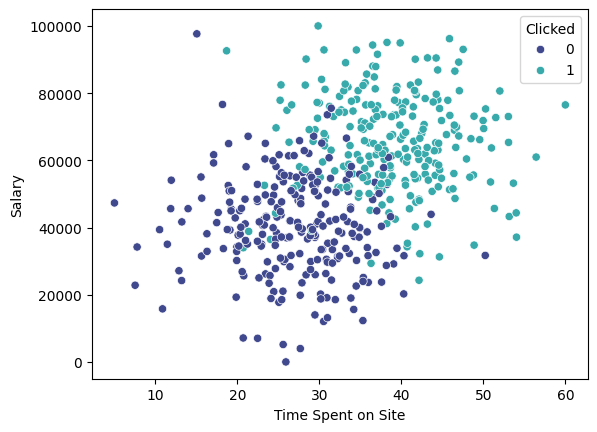

In [42]:
sns.scatterplot(x='Time Spent on Site', y = 'Salary', data=training_set, palette='mako', hue = 'Clicked')

<Axes: xlabel='Time Spent on Site', ylabel='Salary'>

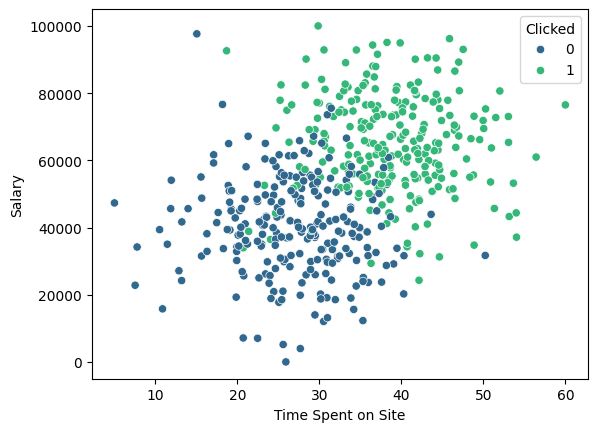

In [43]:
sns.scatterplot(x='Time Spent on Site', y='Salary', data=training_set, hue='Clicked', palette='viridis')